In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from data.common import FEATURE_DESC, get_label_name_by_id
%matplotlib inline

2021-10-09 00:18:19.601956: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-09 00:18:19.601986: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# dataset parse and visualization
read record file and parse to the meaning items:
* if feature type is image then use `tf.image.decode_png` to decode
* if feature type is label，then case to int32 label id

the feature type defined in `common.py`
### read and parse the dataset

In [2]:
raw_dataset = tf.data.TFRecordDataset(['quick-draw-train.record'])
def parse_record(record):
    example = tf.io.parse_single_example(record, FEATURE_DESC)
    image_tensor = tf.image.decode_png(example['image/encoded'])
    image = tf.reshape(image_tensor, [256, 256])
    label = tf.cast(example['image/class/label'], tf.int32)
    return image, label

dataset = raw_dataset.map(parse_record, tf.data.AUTOTUNE)

2021-10-09 00:18:26.340567: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-09 00:18:26.342133: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-09 00:18:26.342166: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-09 00:18:26.342194: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chenxie-X410UV): /proc/driver/nvidia/version does not exist
2021-10-09 00:18:26.343993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the 

The number of examples in dataset:

In [3]:
sum(1 for _ in dataset)

2021-10-09 00:18:33.239979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-09 00:18:33.259489: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


15383

### visualize the dataset
lookup one example, change the skip param to visualize different item

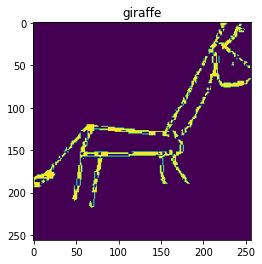

In [4]:
one_dataset = dataset.skip(10000).take(1)
for img, label_id in one_dataset:
    plt.title(get_label_name_by_id(label_id))
    plt.imshow(img)

# Do predict using the trainned keras model
Load the latest checkpoints model and predict the image bellow
### predicted image

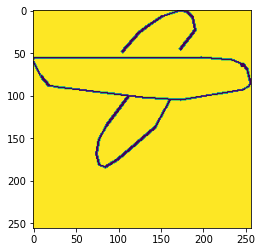

In [14]:
img = plt.imread('./res/airplane.png')
plt.imshow(img)

### load model and do predict

In [16]:
model = keras.models.load_model('./ckpt/ckpt-loss=1.42')
input_img = img.reshape(1, 256, 256, 1).astype(np.float32)
result = model.predict(input_img)

### print the result

In [17]:
idx = np.argmax(result[0])
print("class: {}({}) conf: {}".format(get_label_name_by_id(idx), idx, result[0][idx]))

class: light bulb(38) conf: 0.6292840242385864
